# CS 688 - Project Assignment 5
### Author : Tejas Yogesh Pawar

In [1]:
from sklearn.datasets import fetch_20newsgroups
import spacy
import pickle
import string
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer


# 1. Read fetch_20newsgroups from sklearn.datasets.

In [2]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all')

In [3]:
topics = list(set(newsgroups.target_names))
topics.sort()

topics

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:

nlp = spacy.load("en_core_web_sm")


# 2. Data Preprocessing 

### 1. Tokenization: Splitting the text into individual words or tokens. This is a fundamental step in text preprocessing.

In [3]:
full_data = newsgroups.data

# Tokenizing the dataset
tokenized_texts = []
for text in full_data:
    doc = nlp(text)
    tokens = [token.text for token in doc]
    tokenized_texts.append(tokens)

In [4]:
#import pickle

#with open('tokenized_texts.pkl', 'wb') as file:
   # pickle.dump(tokenized_texts, file)


In [112]:

with open('tokenized_texts.pkl', 'rb') as file:
    tokenized_texts = pickle.load(file)


### 2. Lowercasing: Convert all characters in the text to lowercase. This helps in maintaining uniformity and reducing redundancy (e.g., "Email" and "email" are treated as the same word).

In [113]:
# Lowercasing the tokens in the tokenized dataset
lowercased_texts = []
for document in tokenized_texts:
    lowercased_document = [token.lower() for token in document]
    lowercased_texts.append(lowercased_document)

# Displaying the first few lowercased tokens of the first document as an example
print(lowercased_texts[0][:20])

['from', ':', 'mamatha', 'devineni', 'ratnam', '<', 'mr47+@andrew.cmu.edu', '>', '\n', 'subject', ':', 'pens', 'fans', 'reactions', '\n', 'organization', ':', 'post', 'office', ',']


### 3. Removing Punctuation and Special Characters: Punctuation and special characters often don't contribute to the meaning of a text for analysis purposes.

In [114]:
# Create a function that removes punctuation from each token.
def remove_punctuation(tokens):
    return [token for token in tokens if token not in string.punctuation]

In [115]:
# Use this function to process each document in your dataset.
cleaned_texts = []
for document in lowercased_texts:
    cleaned_document = remove_punctuation(document)
    cleaned_texts.append(cleaned_document)
    
print(cleaned_texts[0][:20])

['from', 'mamatha', 'devineni', 'ratnam', 'mr47+@andrew.cmu.edu', '\n', 'subject', 'pens', 'fans', 'reactions', '\n', 'organization', 'post', 'office', 'carnegie', 'mellon', 'pittsburgh', 'pa', '\n', 'lines']


### 4.Removing Stop Words: Stop words are common words that usually don't carry much meaning and are thus often removed. Examples include "is", "and", "the", etc.

In [116]:
# Get the List of Stop Words: spaCy's language model includes a list of stop words.
stop_words = nlp.Defaults.stop_words

In [117]:
# Create a function that filters out stop words from the tokens.
def remove_stop_words(tokens):
    return [token for token in tokens if token not in stop_words]

In [118]:
# Use this function to process each document in your dataset.
no_stop_words_texts = []
for document in cleaned_texts:  
    no_stop_word_document = remove_stop_words(document)
    no_stop_words_texts.append(no_stop_word_document)
print(no_stop_words_texts[0][:20])

['mamatha', 'devineni', 'ratnam', 'mr47+@andrew.cmu.edu', '\n', 'subject', 'pens', 'fans', 'reactions', '\n', 'organization', 'post', 'office', 'carnegie', 'mellon', 'pittsburgh', 'pa', '\n', 'lines', '12']


### 5. Removing Numbers: Depending on the context, numbers might not add significant meaning to the text and can be removed.

In [119]:
def remove_numbers_and_nonstandard_words(tokens):
    cleaned_tokens = []
    for token in tokens:
        if not re.search(r'\d', token) and len(token) > 2:
            cleaned_tokens.append(token)
    return cleaned_tokens

# Apply this function to your tokenized data
no_numbers_nonstandard_texts = [remove_numbers_and_nonstandard_words(doc) for doc in no_stop_words_texts]

In [120]:
def remove_numbers(tokens):
    # This regex pattern matches any token that contains a digit
    pattern = re.compile(r'.*\d+.*')
    return [token for token in tokens if not pattern.match(token)]

# Apply this enhanced number removal function

no_numbers_nonstandard_texts = [remove_numbers(doc) for doc in no_numbers_nonstandard_texts]


In [121]:
print(no_numbers_nonstandard_texts[0][:20])

['mamatha', 'devineni', 'ratnam', 'subject', 'pens', 'fans', 'reactions', 'organization', 'post', 'office', 'carnegie', 'mellon', 'pittsburgh', 'lines', 'nntp', 'posting', 'host', '\n\n\n\n', 'sure', 'bashers']


### 6. Removing Email Addresses, URLs: These often don't contribute to the overall meaning of the text and can be removed.

In [122]:
# Regex patterns for email addresses and URLs
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def remove_emails_and_urls(text):
    text = re.sub(email_pattern, '', text)
    text = re.sub(url_pattern, '', text)
    return text

# Convert each document from a list of tokens to a single string
string_texts = [' '.join(doc) for doc in no_numbers_nonstandard_texts]

# Apply the function to remove emails and URLs
cleaned_texts = [remove_emails_and_urls(doc) for doc in string_texts]

# Tokenize again if needed
tokenized_cleaned_texts = [[token.text for token in nlp(doc)] for doc in cleaned_texts]

['mamatha', 'devineni', 'ratnam', 'subject', 'pens', 'fans', 'reactions', 'organization', 'post', 'office', 'carnegie', 'mellon', 'pittsburgh', 'lines', 'nntp', 'posting', 'host', '\n\n\n\n ', 'sure', 'bashers']


In [ ]:
# Example: Displaying the first few tokens of the first document
print(tokenized_cleaned_texts[0][:20])

In [96]:
with open('tokenized_cleaned_texts.pkl', 'wb') as file:
    pickle.dump(tokenized_cleaned_texts, file)

In [97]:
with open('tokenized_cleaned_texts.pkl', 'rb') as file:
    tokenized_cleaned_texts = pickle.load(file)


### 7. Handling or Removing HTML Tags: If the data contains HTML tags, you might need to remove or process them.

In [98]:
# Load the English tokenizer from spaCy
nlp = spacy.load("en_core_web_sm")

In [99]:
# Function to remove HTML tags using BeautifulSoup
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Join the tokens into strings
joined_texts = [' '.join(doc) for doc in tokenized_cleaned_texts]

# Remove HTML tags
no_html_texts = [remove_html_tags(doc) for doc in joined_texts]

# Retokenize the texts
re_tokenized_texts = [[token.text for token in nlp(doc)] for doc in no_html_texts]

/var/folders/yc/sf39g4816w5g2525wzhs1zw00000gn/T/ipykernel_29452/2315156378.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


['mamatha', 'devineni', 'ratnam', 'subject', 'pens', 'fans', 'reactions', 'organization', 'post', 'office', 'carnegie', 'mellon', 'pittsburgh', 'lines', 'nntp', 'posting', 'host', '\n\n\n\n  ', 'sure', 'bashers']


In [ ]:
# Example: Displaying the first few tokens of the first document
print(re_tokenized_texts[0][:20])

In [100]:
with open('re_tokenized_texts.pkl', 'wb') as file:
    pickle.dump(re_tokenized_texts, file)

In [101]:
with open('re_tokenized_texts.pkl', 'rb') as file:
    re_tokenized_texts = pickle.load(file)

In [102]:
# Removing specific unwanted strings like '\n  ' from tokenized texts
cleaned_tokenized_texts = [[token for token in doc if token not in ['\n  ', '\n  ', ' \n  ', '\n\n\n\n  ', '\n    ', '\n\n', '           ', '']] for doc in re_tokenized_texts]

# Example: Displaying the first few tokens of the first document
print(cleaned_tokenized_texts[0][:100])


['mamatha', 'devineni', 'ratnam', 'subject', 'pens', 'fans', 'reactions', 'organization', 'post', 'office', 'carnegie', 'mellon', 'pittsburgh', 'lines', 'nntp', 'posting', 'host', 'sure', 'bashers', 'pens', 'fans', 'pretty', 'confused', 'lack', 'kind', 'posts', 'recent', 'pens', 'massacre', 'devils', 'actually', 'bit', 'puzzled', 'bit', 'relieved', 'going', 'end', 'non', 'pittsburghers', 'relief', 'bit', 'praise', 'pens', 'man', 'killing', 'devils', 'worse', 'thought', 'jagr', 'showed', 'better', 'regular', 'season', 'stats', 'lot', 'fun', 'watch', 'playoffs', 'bowman', 'let', 'jagr', 'lot', 'fun', 'couple', 'games', 'pens', 'going', 'beat', 'pulp', 'jersey', 'disappointed', 'islanders', 'lose', 'final', 'regular', 'season', 'game', 'pens', 'rule']


### 8. Stemming: This involves cutting words down to their root form. For example, "running", "runs", "ran" are all stemmed to "run".

In [103]:
# Use NLTK's PorterStemmer for stemming.
stemmer = PorterStemmer()


stemmed_texts = [[stemmer.stem(token) for token in doc] for doc in cleaned_tokenized_texts]

# Example: Displaying the first few stemmed tokens of the first document
print(stemmed_texts[0][:20])

['mamatha', 'devineni', 'ratnam', 'subject', 'pen', 'fan', 'reaction', 'organ', 'post', 'offic', 'carnegi', 'mellon', 'pittsburgh', 'line', 'nntp', 'post', 'host', 'sure', 'basher', 'pen']


### 9. Lemmatization: Similar to stemming, but it brings context to the words. So, it links words with similar meanings to one word. For example, "better" is lemmatized to "good".

In [104]:
# Join the stemmed tokens back into sentences
joined_stemmed_texts = [' '.join(doc) for doc in stemmed_texts]

# Apply lemmatization to the joined texts
lemmatized_texts = [[token.lemma_ for token in nlp(doc)] for doc in joined_stemmed_texts]

# Example: Displaying the first few lemmatized tokens of the first document
print(lemmatized_texts[0][:20])

['mamatha', 'devineni', 'ratnam', 'subject', 'pen', 'fan', 'reaction', 'organ', 'post', 'offic', 'carnegi', 'mellon', 'pittsburgh', 'line', 'nntp', 'post', 'host', 'sure', 'basher', 'pen']


In [105]:
with open('lemmatized_texts.pkl', 'wb') as file:
    pickle.dump(lemmatized_texts, file)

In [5]:
with open('lemmatized_texts.pkl', 'rb') as file:
    lemmatized_texts = pickle.load(file)

# 3. Create bag of words.


Creating a Bag-of-Words (BoW) model is indeed an essential step before applying topic modeling algorithms like Latent Dirichlet Allocation (LDA). The Bag-of-Words model transforms your preprocessed text data into a numerical format that machine learning algorithms can process.

In [6]:
# Join the Tokens into a Single String for Each Document:
processed_texts = [' '.join(doc) for doc in lemmatized_texts]  

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(processed_texts)

# 4. Apply one type of the Topic Modeling method LDA to find the news topics.

In [8]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 20  # Define the number of topics
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=10, learning_method='online', random_state=0)
lda.fit(X)


LatentDirichletAllocation(learning_method='online', n_components=20,
                          random_state=0)

In [10]:
# Display the Topics:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
game team year win player play good write fan articl
Topic 1:
israel jew isra arab jewish palestinian germani peac attack kill
Topic 2:
post host nntp edu univer write articl repli distribut apr
Topic 3:
xterm lib librari sourc usr client compil includ echo xview
Topic 4:
god christian write believ jesu exist church mean moral religion
Topic 5:
illinoi auto speed detector ticket monitor radar urbana write articl
Topic 6:
ax max giz appear bhj wolverin comic hulk cx art
Topic 7:
armenian turkish muslim greek turk armenia turkey soviet war russian
Topic 8:
hockey pittsburgh goal play nhl period leaf wing van playoff
Topic 9:
car post write articl nntp edu host univer good engin
Topic 10:
peopl think like know time say come thing way good
Topic 11:
drive card disk problem mac work driver control scsi board
Topic 12:
gun govern state articl law right peopl write presid american
Topic 13:
water food batteri caus heat effect lead oil energi ga
Topic 14:
window file program imag use 

# 5. After finding the “Topics” visualize and discuss each topic by word counts or word clouds.


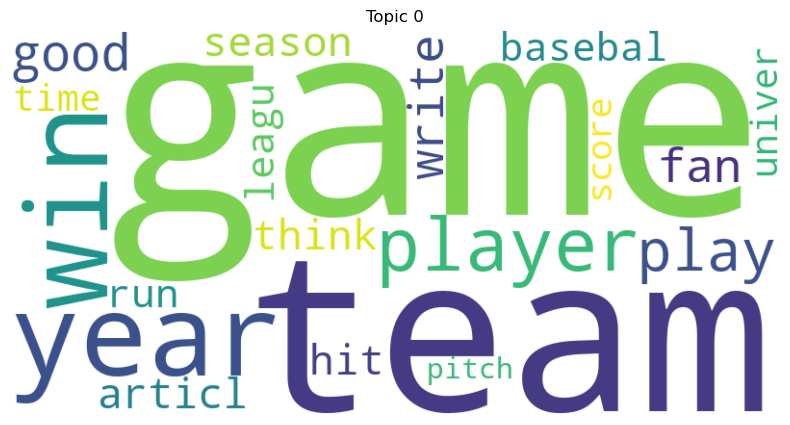

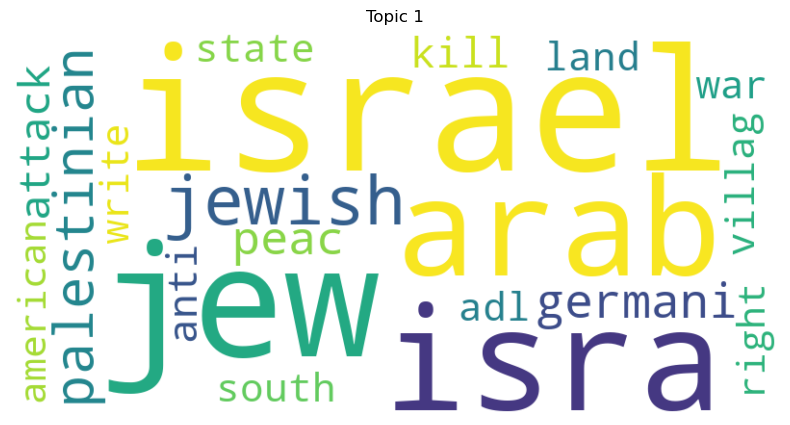

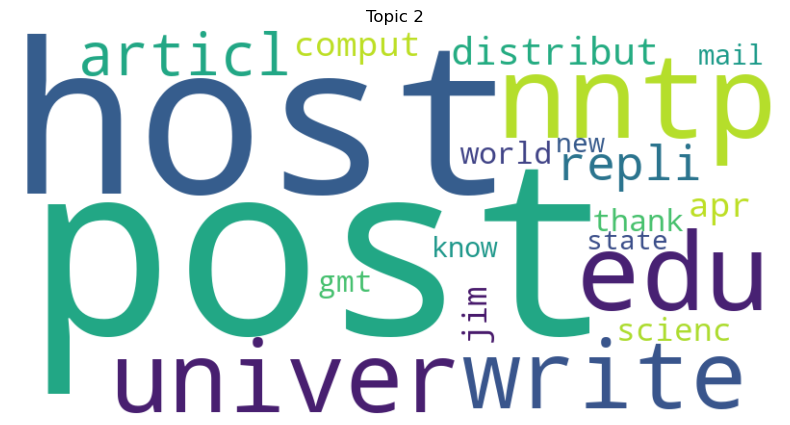

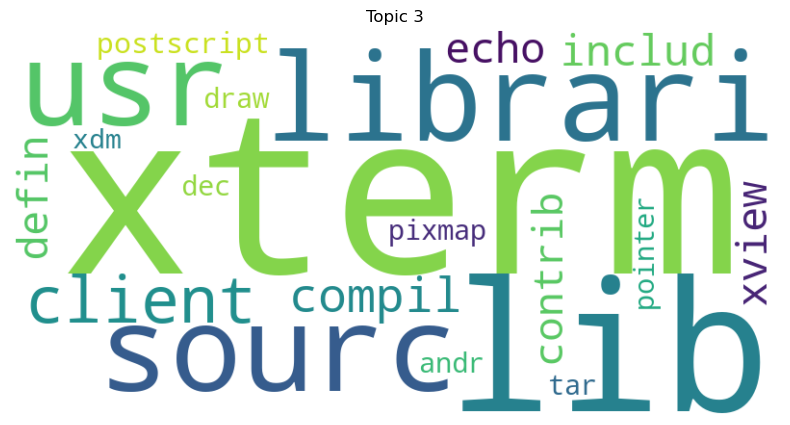

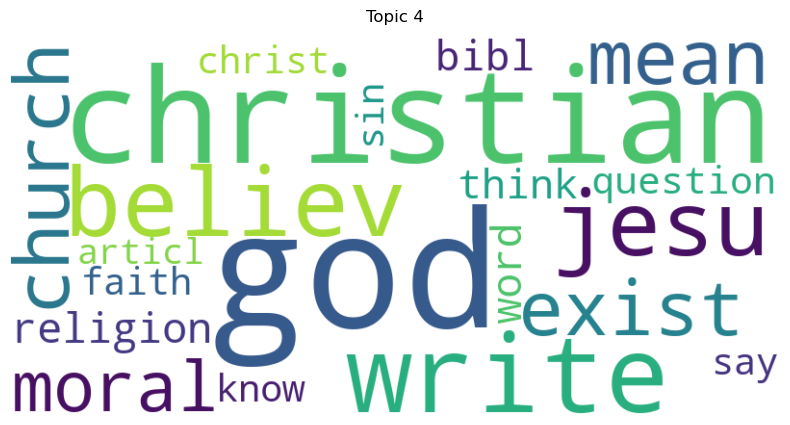

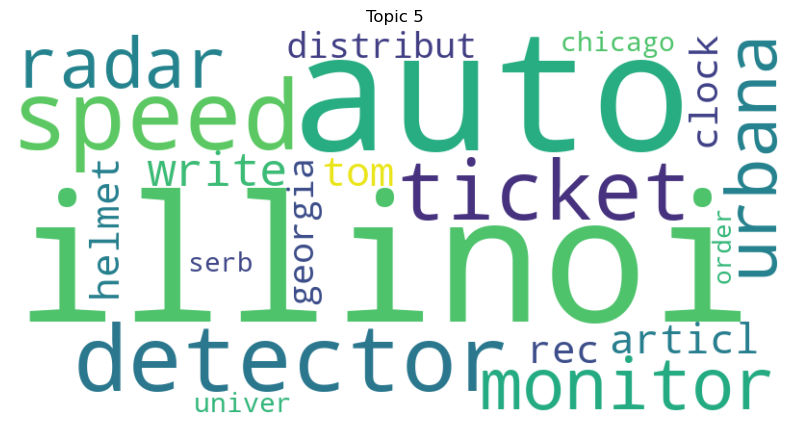

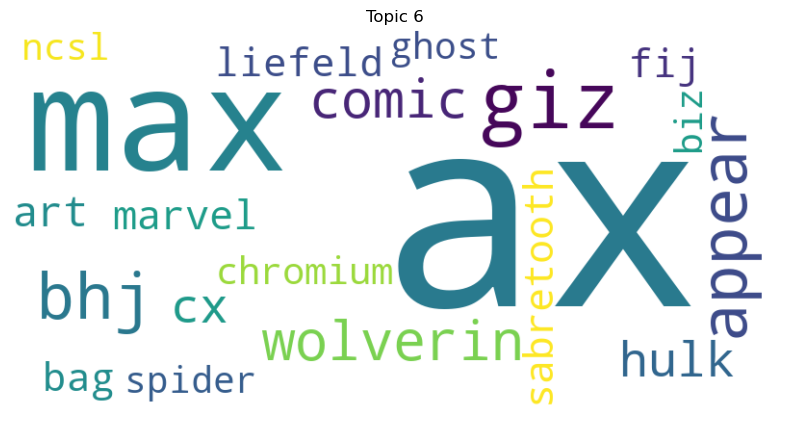

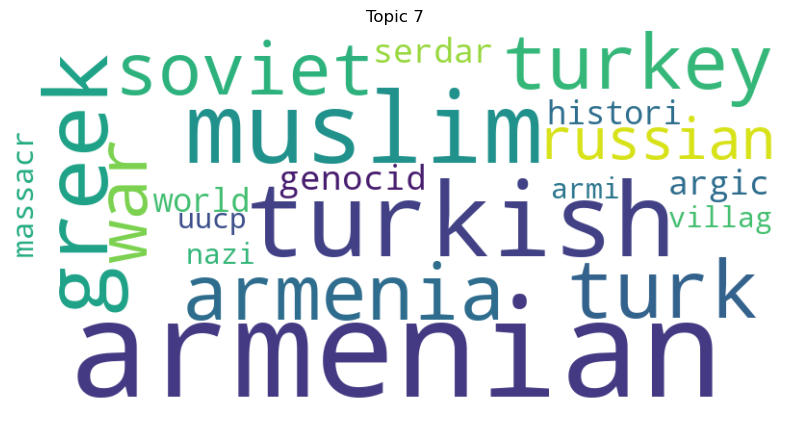

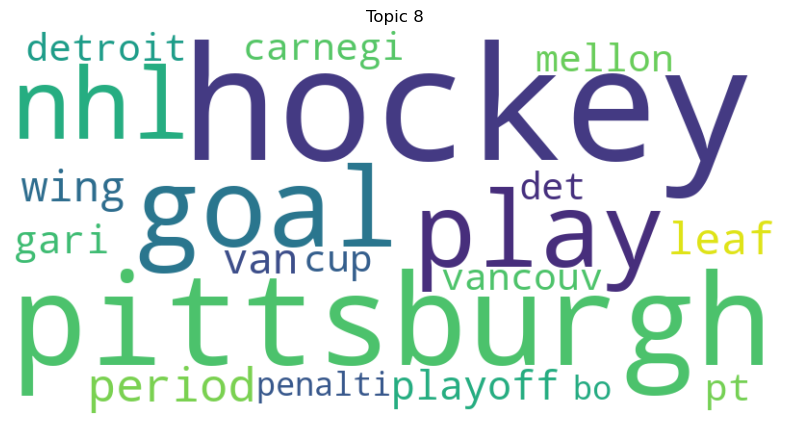

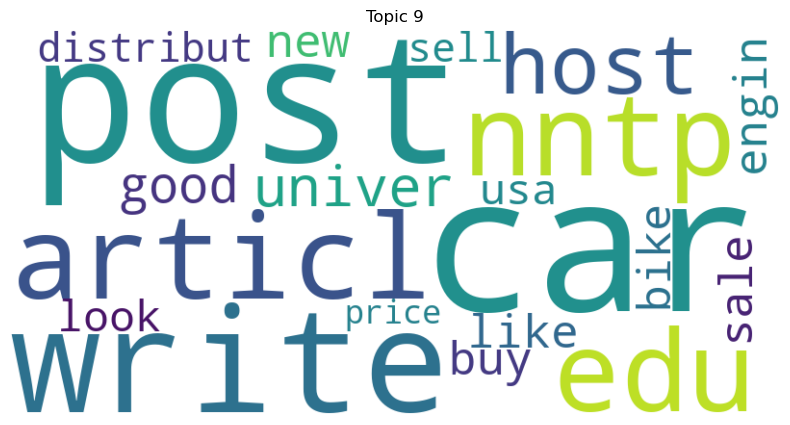

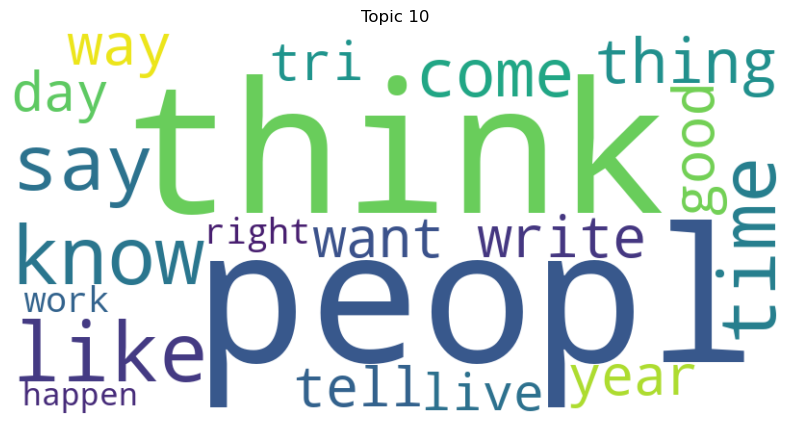

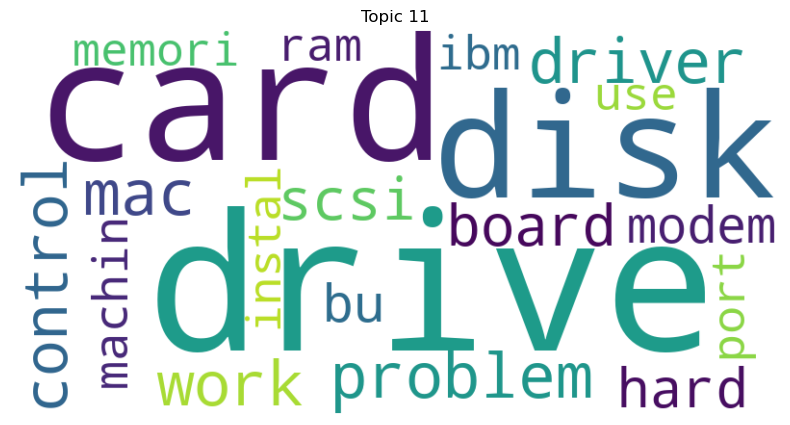

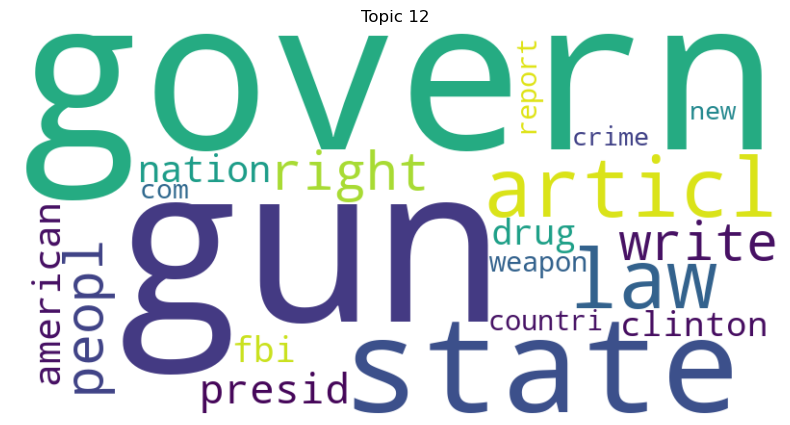

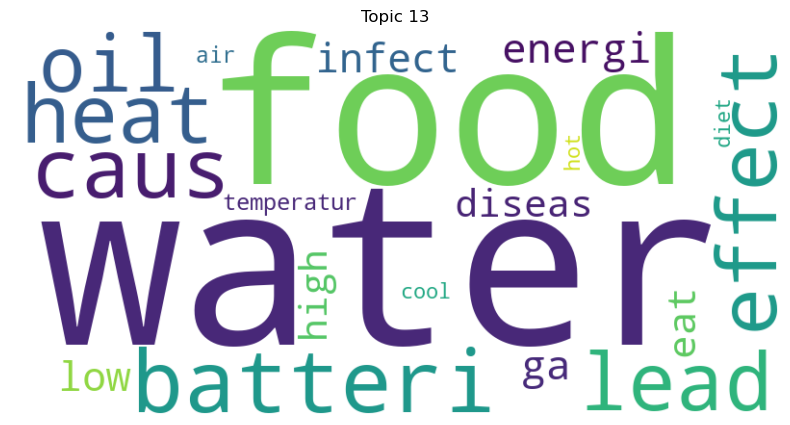

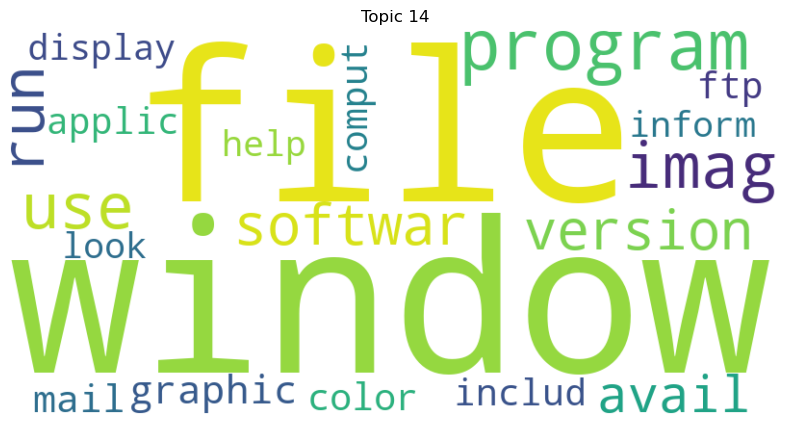

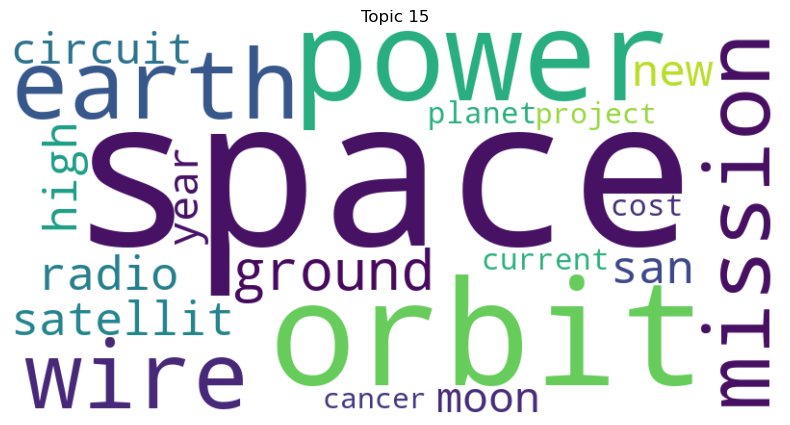

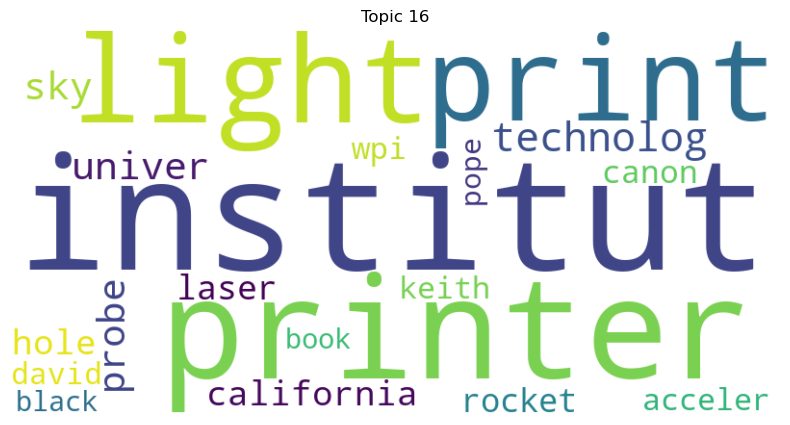

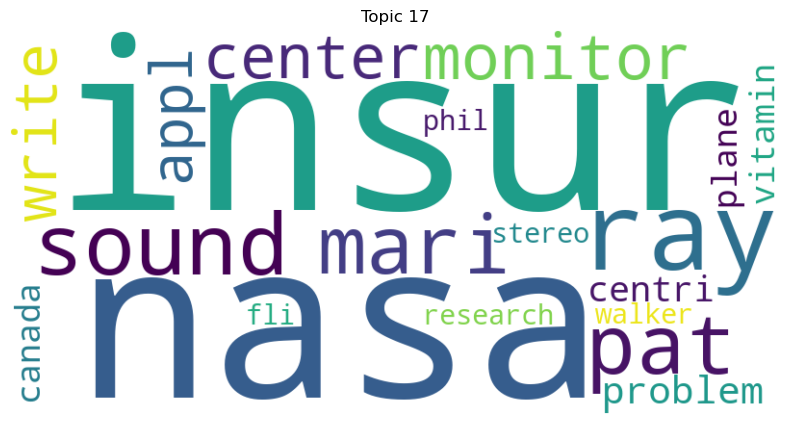

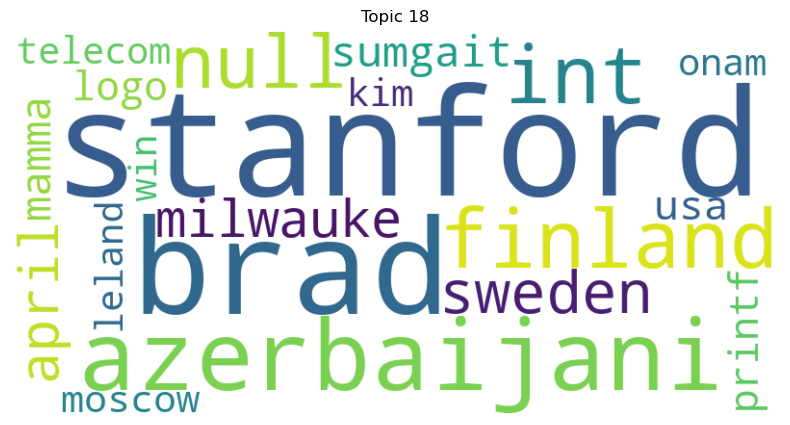

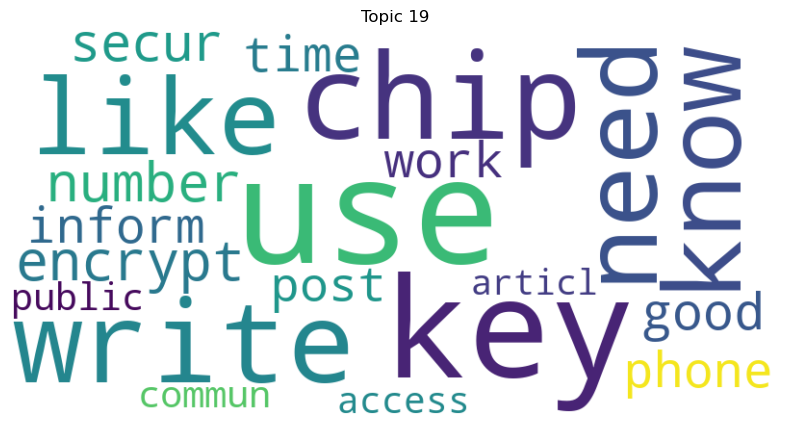

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create a word cloud for each topic
def create_word_clouds(model, feature_names, n_words):
    for topic_idx, topic in enumerate(model.components_):
        # Combine the words and their weights into a single string
        topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
        
        # Plot
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_idx}')
        plt.axis("off")
        plt.show()

create_word_clouds(lda, vectorizer.get_feature_names_out(), 20)  # Adjust '20' for number of words per topic


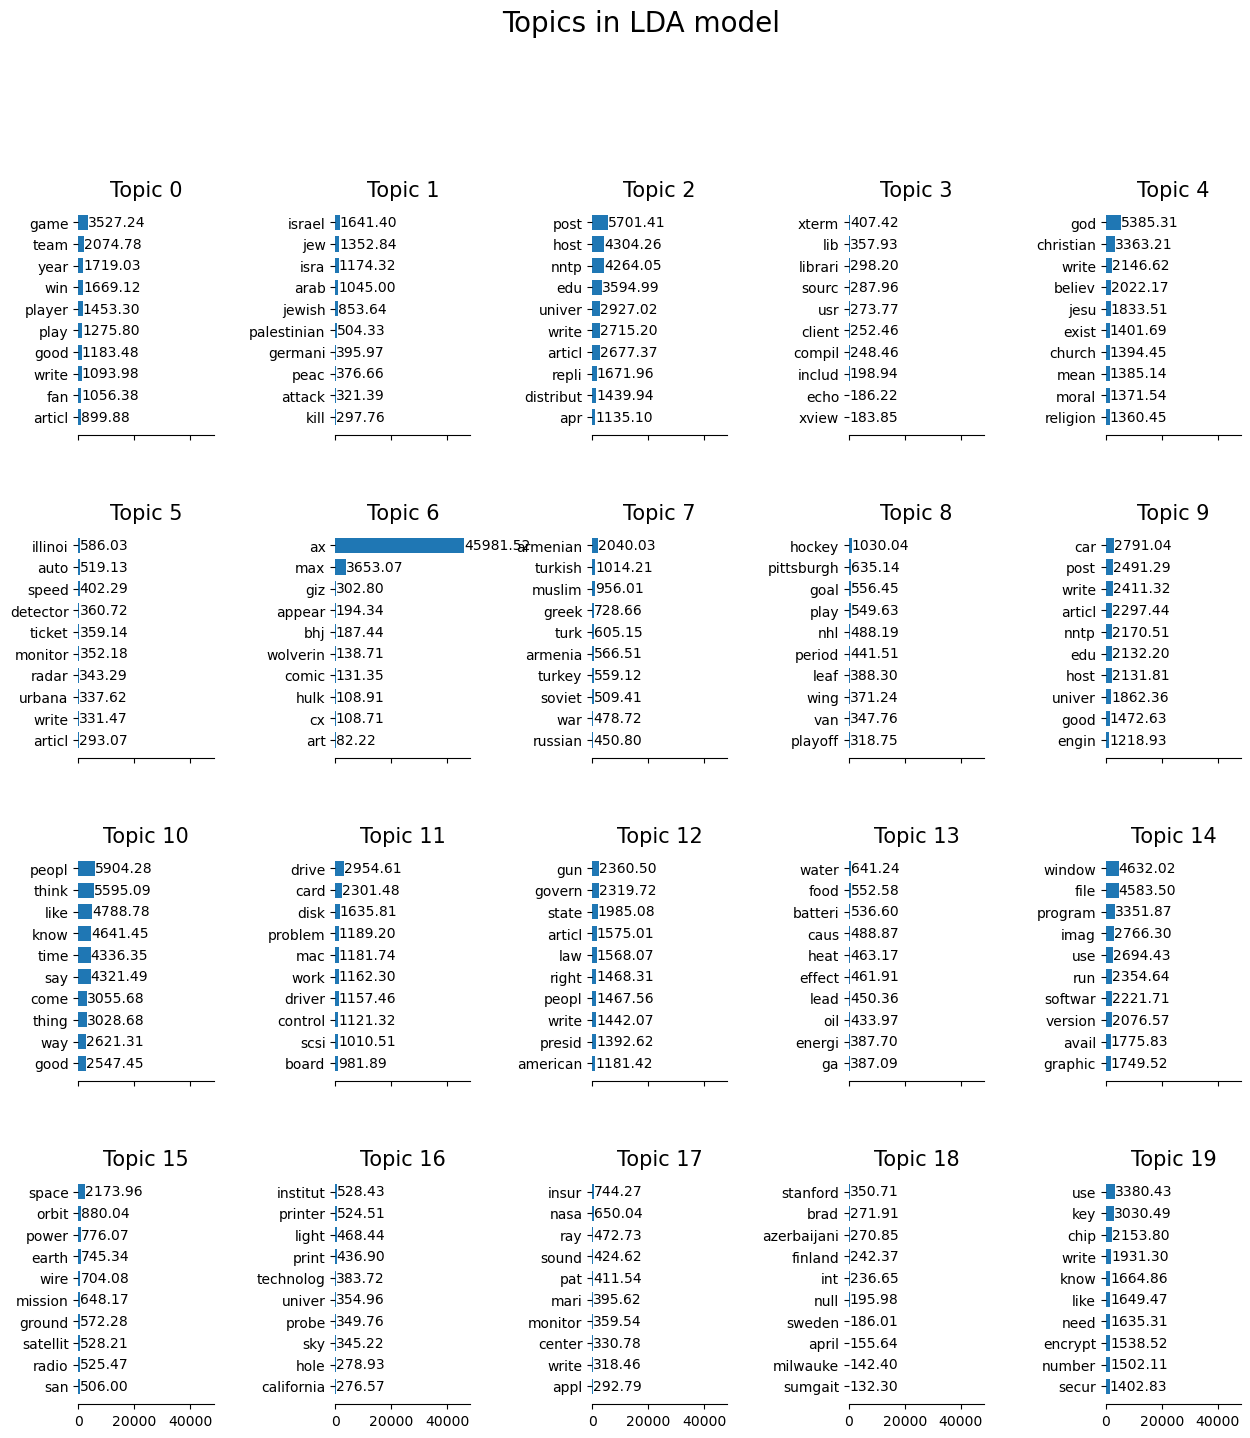

In [22]:
def plot_top_words_optimized_and_save(model, feature_names, n_words, title, output_filename):
    # Smaller figure size
    fig, axes = plt.subplots(4, 5, figsize=(15, 15), sharex=True)
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_words:][::-1]  # Descending order
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        bars = ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx}', fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)

        # Add text labels on bars
        for bar in bars:
            width = bar.get_width()
            label_x_pos = width + 0.02
            ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

    fig.suptitle(title, fontsize=20)
    plt.subplots_adjust(top=0.85, bottom=0.05, wspace=0.90, hspace=0.4)

    # Set the figure background to transparent
    fig.patch.set_facecolor('none')
    fig.patch.set_edgecolor('none')

    # Save the plot as a PNG file
    plt.savefig(output_filename, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()

n_top_words = 10
output_filename = 'lda_topics.png'  # Define the output file name
plot_top_words_optimized_and_save(lda, vectorizer.get_feature_names_out(), n_top_words, 'Topics in LDA model', output_filename)


In [16]:
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

# Function to extract topics from the scikit-learn LDA model
def extract_topics(lda_model, feature_names, n_words):
    topics = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_features_ind = topic.argsort()[:-n_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        topics.append(top_features)
    return topics

# Extract topics
n_words = 10  # Number of top words per topic
lda_topics = extract_topics(lda, vectorizer.get_feature_names_out(), n_words)

# Create Dictionary and Corpus for Gensim
dictionary = corpora.Dictionary(tokenized_texts_gensim)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts_gensim]

# Calculate Coherence
coherence_model_lda = CoherenceModel(topics=lda_topics, texts=tokenized_texts_gensim, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)


Coherence Score: 0.6037321905994115


In [17]:
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora



# Create a Gensim dictionary
dictionary = corpora.Dictionary(tokenized_texts_gensim)

# Create a corpus using the dictionary
corpus = [dictionary.doc2bow(text) for text in tokenized_texts_gensim]

# Calculate coherence for each topic
topic_coherences = []
for topic in lda_topics:
    # Coherence model for a single topic
    coherence_model = CoherenceModel(topics=[topic], texts=tokenized_texts_gensim, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    topic_coherences.append(coherence_score)

# Print coherence scores for each topic
for idx, score in enumerate(topic_coherences):
    print(f"Coherence score for Topic {idx}: {score}")


Coherence score for Topic 0: 0.6721113431593249
Coherence score for Topic 1: 0.7795367742747821
Coherence score for Topic 2: 0.8421410001083386
Coherence score for Topic 3: 0.6465666972062846
Coherence score for Topic 4: 0.6788084407407659
Coherence score for Topic 5: 0.49983849338447417
Coherence score for Topic 6: 0.23812122308249886
Coherence score for Topic 7: 0.8724106830821476
Coherence score for Topic 8: 0.8029220791264322
Coherence score for Topic 9: 0.6882697184336871
Coherence score for Topic 10: 0.5529595052147401
Coherence score for Topic 11: 0.682882258976675
Coherence score for Topic 12: 0.5437864906728926
Coherence score for Topic 13: 0.6077070984913014
Coherence score for Topic 14: 0.7397778356586272
Coherence score for Topic 15: 0.5771058881259877
Coherence score for Topic 16: 0.41663987810588043
Coherence score for Topic 17: 0.31742336047705755
Coherence score for Topic 18: 0.38631378517136006
Coherence score for Topic 19: 0.5293212584949719


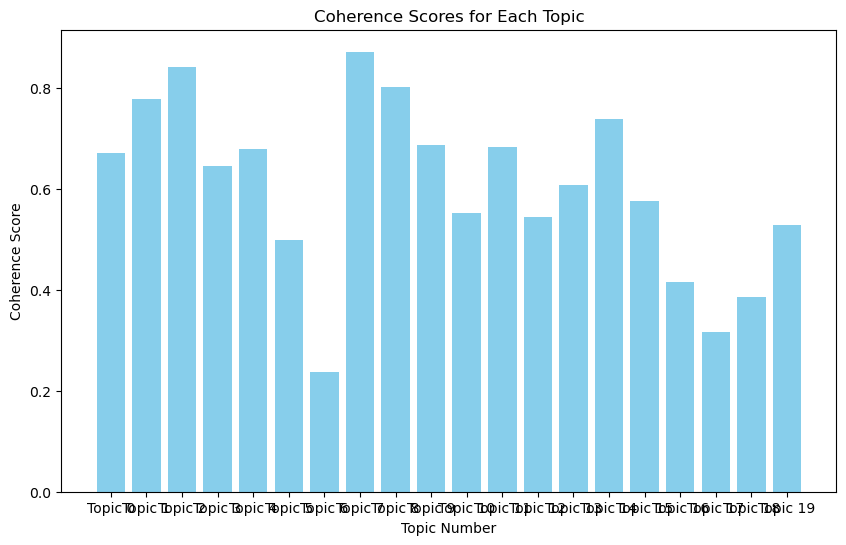

In [24]:
import matplotlib.pyplot as plt


# Number of topics
n_topics = len(topic_coherences)

# Creating a bar chart for coherence scores
plt.figure(figsize=(10, 6))
plt.bar(range(n_topics), topic_coherences, color='skyblue')
plt.xlabel('Topic Number')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores for Each Topic')
plt.xticks(range(n_topics), [f'Topic {i}' for i in range(n_topics)])

# Save the plot as a PNG file
plt.savefig('coherence_scores.png', bbox_inches='tight', transparent=True)
plt.show()

